In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"openpowerlifting.csv")
df.head()

C:\Users\austi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Dominik Gabriel,M,B,Raw,17.0,16-17,14-18,T 16-17,102.5,110,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
1,Marek Herák,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,59.8,60,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
2,Miroslav Adamove,M,B,Multi-ply,18.0,18-19,14-18,T 18-19,87.7,90,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
3,Kamil Lipiňski,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,89.5,90,...,NaN,Poland,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
4,Gabriel Kováč,M,B,Multi-ply,20.0,20-23,19-23,Juniors,81.6,82.5,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships


In [3]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) 

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,1419502.000000,2292039.000000,549758.000000,543273.000000,527127.000000,5985.000000,1524386.000000,923869.000000,912320.000000,882264.000000,...,630974.000000,618197.000000,588691.000000,15756.000000,1650826.000000,2156255.000000,2136657.000000,2136657.000000,2136657.000000,1946599.000000
mean,30.933739,84.024148,112.112249,92.423478,32.292355,72.443621,174.900324,83.478500,55.144483,-18.069771,...,159.325046,129.679115,16.470384,77.566102,189.259316,375.284879,272.987629,272.007686,256.511400,63.861166
std,13.168007,22.725675,144.013991,169.158698,196.007537,188.123394,70.000380,104.348023,129.198923,143.206294,...,109.728350,159.977589,212.274252,188.836465,62.559107,206.985681,130.308221,129.818665,123.477726,16.213174
min,0.000000,15.100000,-555.000000,-580.000000,-600.500000,-550.000000,-508.020000,-502.500000,-575.000000,-575.000000,...,-461.000000,-470.000000,-587.500000,-461.000000,-410.000000,1.000000,0.680000,0.670000,0.640000,0.500000
25%,20.500000,67.040000,87.500000,70.000000,-160.000000,-100.000000,122.500000,55.000000,-52.500000,-140.000000,...,125.000000,115.000000,-205.000000,-100.000000,140.000000,200.000000,140.430000,139.870000,132.540000,52.140000
50%,27.500000,81.950000,145.000000,142.900000,110.000000,130.500000,170.000000,105.000000,95.000000,-60.000000,...,180.000000,177.500000,117.500000,142.500000,190.000000,349.270000,293.670000,292.800000,273.360000,63.580000
75%,39.000000,98.880000,200.000000,202.500000,190.000000,200.000000,220.000000,145.000000,145.000000,120.000000,...,225.000000,230.000000,205.000000,206.380000,235.000000,530.700000,371.490000,370.010000,350.450000,75.140000
max,98.000000,260.200000,555.000000,577.500000,560.000000,592.390000,581.050000,467.500000,487.500000,478.540000,...,450.000000,460.400000,457.500000,440.500000,460.400000,1407.500000,795.220000,793.330000,756.900000,146.490000


In [4]:
df.Equipment.unique()

array(['Raw', 'Multi-ply', 'Single-ply', 'Wraps', 'Unlimited', 'Straps'],
      dtype=object)

In [5]:
df = df.drop(df[df.Equipment == 'Straps'].index.tolist()) #drop straps - mainly exhibition, not actual meets

In [6]:
for c in df.columns:
    na_count = df[c].isna().sum()
    if na_count > 0:
        na_percent = round(na_count/len(df)*100, 1)
        print(f'{c} has {na_count} nulls, which is {na_percent}% of the dataset')

Age has 902276 nulls, which is 38.9% of the dataset
AgeClass has 690405 nulls, which is 29.7% of the dataset
BirthYearClass has 847866 nulls, which is 36.5% of the dataset
Division has 2391 nulls, which is 0.1% of the dataset
BodyweightKg has 29745 nulls, which is 1.3% of the dataset
WeightClassKg has 26000 nulls, which is 1.1% of the dataset
Squat1Kg has 1771987 nulls, which is 76.3% of the dataset
Squat2Kg has 1778472 nulls, which is 76.6% of the dataset
Squat3Kg has 1794618 nulls, which is 77.3% of the dataset
Squat4Kg has 2315760 nulls, which is 99.7% of the dataset
Best3SquatKg has 797359 nulls, which is 34.3% of the dataset
Bench1Kg has 1397876 nulls, which is 60.2% of the dataset
Bench2Kg has 1409425 nulls, which is 60.7% of the dataset
Bench3Kg has 1439481 nulls, which is 62.0% of the dataset
Bench4Kg has 2305301 nulls, which is 99.3% of the dataset
Best3BenchKg has 284148 nulls, which is 12.2% of the dataset
Deadlift1Kg has 1690811 nulls, which is 72.8% of the dataset
Deadlift

In [7]:
df=df.drop(['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg','Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
           'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg'], axis=1)

In [8]:
neg_best = np.where((df.Best3SquatKg <0) | (df.Best3BenchKg <0) | (df.Best3DeadliftKg <0))
df_neg_best = df.loc[neg_best]
df_neg_best.shape

(6482, 29)

In [9]:
df = df.drop(df.index[df_neg_best.index.tolist()]) #remove rows with negatives - failed lifts

In [10]:
df = df.dropna(subset=['BodyweightKg'])

In [11]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,1406267.000000,2285562.000000,1507883.000000,2015975.000000,1635455.000000,2136619.000000,2136619.000000,2136619.000000,2136619.000000,1946599.000000
mean,30.925596,84.009855,175.155016,119.383755,189.250723,374.879767,272.988844,272.008906,256.512513,63.861166
std,13.174786,22.718617,67.750549,53.579289,61.518633,206.336807,130.308972,129.819409,123.478453,16.213174
min,0.000000,15.100000,1.000000,1.000000,1.000000,1.000000,0.680000,0.670000,0.640000,0.500000
25%,20.500000,67.040000,122.500000,77.110000,140.000000,200.000000,140.430000,139.870000,132.540000,52.140000
50%,27.500000,81.920000,170.000000,115.000000,188.240000,349.270000,293.670000,292.800000,273.370000,63.580000
75%,39.000000,98.880000,219.990000,152.500000,235.000000,530.000000,371.490000,370.020000,350.455000,75.140000
max,98.000000,260.200000,581.050000,503.490000,460.400000,1407.500000,795.220000,793.330000,756.900000,146.490000


In [12]:
def plot_hist(lift, df=df):
    df_m=df[df.Sex == 'M']
    df_f=df[df.Sex == 'F']
    
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize = (9,4))
    
    for d,c in zip([df_m, df_f],['#6E69B5','#C9253A']):
        bin_width = 2*(d[lift].quantile(0.75) - d[lift].quantile(0.25))*len(d[lift])**(-1/3)
        bins = round((d[lift].max() - d[lift].min())/bin_width)
        plt.hist(d[lift].dropna(), bins = int(bins/2), label=d['Sex'].iloc[0], color = c)
    ax.set_title(lift, fontsize=15)
    ax.set_facecolor('#b3bdc6')
    ax.legend()
    plt.show()

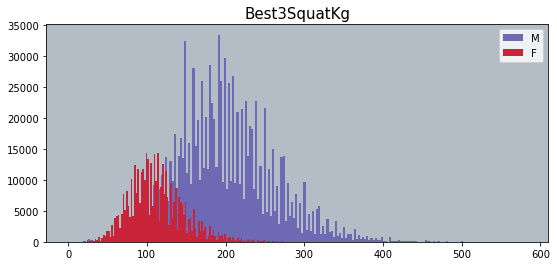

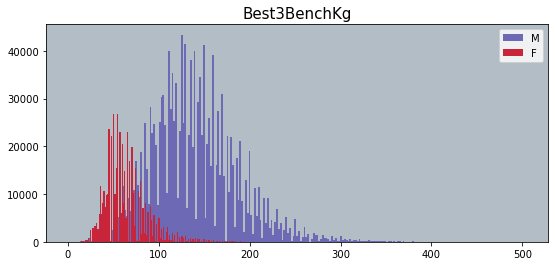

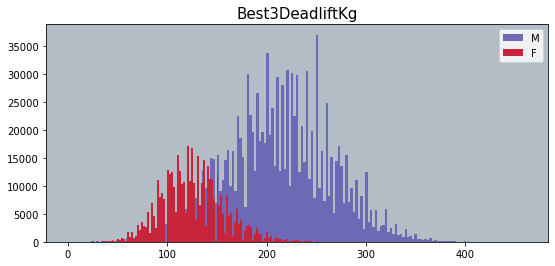

In [13]:
for l in ['Best3SquatKg', 'Best3BenchKg','Best3DeadliftKg']:
    plot_hist(l)

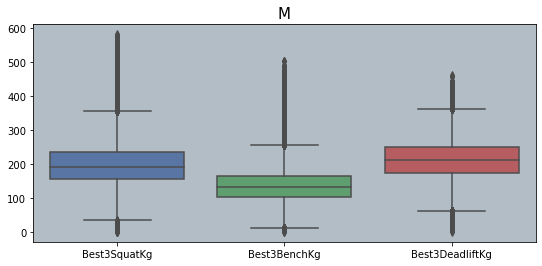

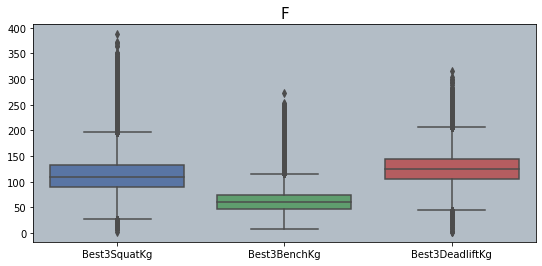

In [14]:
def plot_box(df=df):
    df = df[['Sex','Best3SquatKg', 'Best3BenchKg','Best3DeadliftKg']]
    df_m=df[df.Sex == 'M']
    df_f=df[df.Sex == 'F']
    
    plt.style.use('seaborn-deep')
    
    for d in [df_m, df_f]:
        fig, ax = plt.subplots(figsize = (9,4))
        ax = sns.boxplot(data=d)
        ax.set_title(d.Sex.iloc[0], fontsize=15)
        ax.set_facecolor('#b3bdc6')

        plt.show()

plot_box()

As expected, most

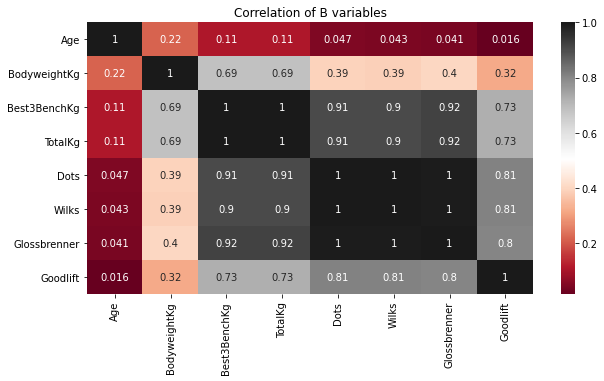

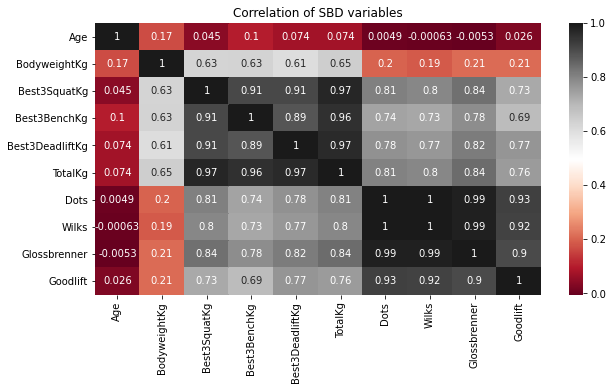

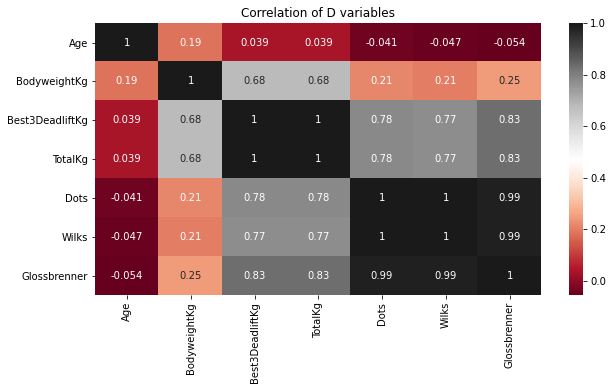

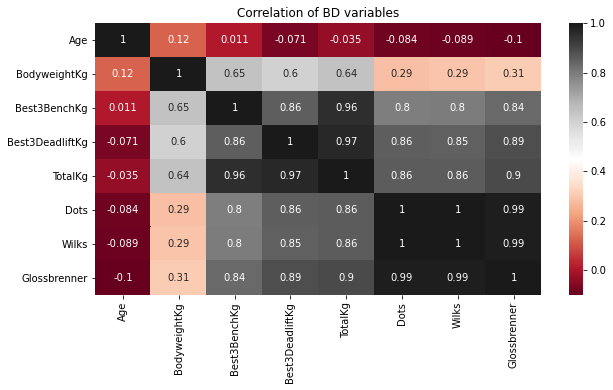

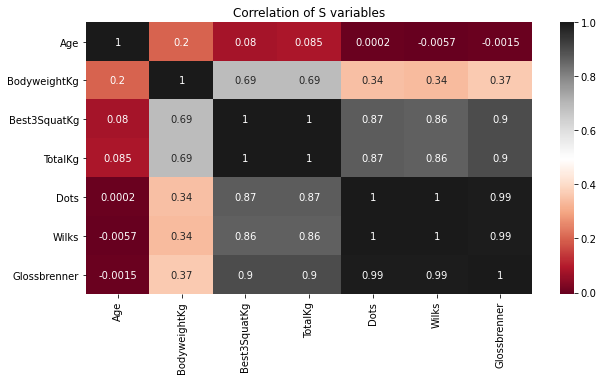

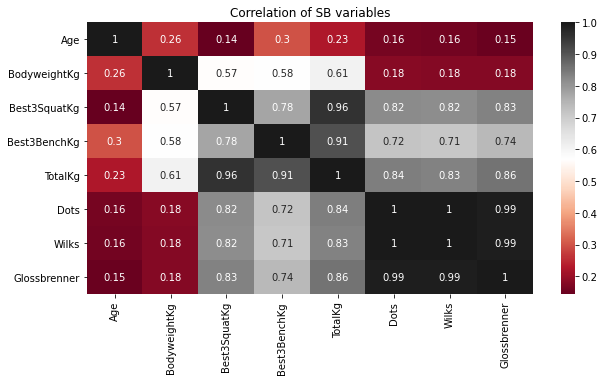

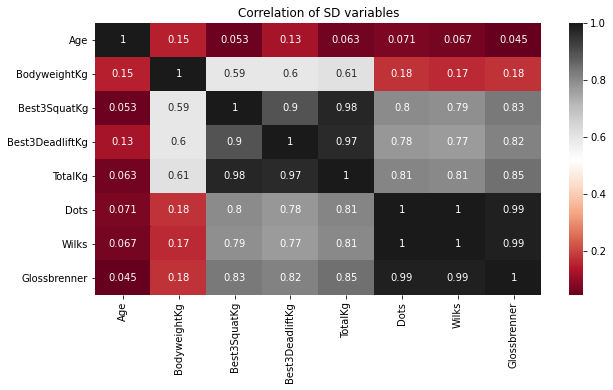

In [18]:
#split dataset by event type
def event_df(event,df=df):
    data = df[df.Event == event]
    return data

for e in df.Event.unique():
    data = event_df(e).dropna(axis=1, how='all')
    vars()[e] = data
    plt.figure(figsize=(10,5))
    cor = data.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.RdGy)
    plt.title(f'Correlation of {e} variables')
    plt.show()

In [14]:
SBD.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
180,Tristan Cianni,M,SBD,Multi-ply,18.0,18-19,NaN,T 18-19,79.6,82.5,...,NaN,Germany,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
181,Robin Hejl,M,SBD,Multi-ply,18.0,18-19,19-23,T 18-19,82.7,90,...,NaN,Czechia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
182,David Mahovský,M,SBD,Multi-ply,20.0,20-23,19-23,Juniors,73.9,75,...,NaN,Czechia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
183,Max Braune,M,SBD,Multi-ply,20.0,20-23,19-23,Juniors,75.0,75,...,NaN,Germany,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
184,Milan Mašek,M,SBD,Multi-ply,23.0,20-23,24-39,Juniors,93.0,100,...,NaN,Czechia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
